In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow_hub import KerasLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Data Loading

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Visualization

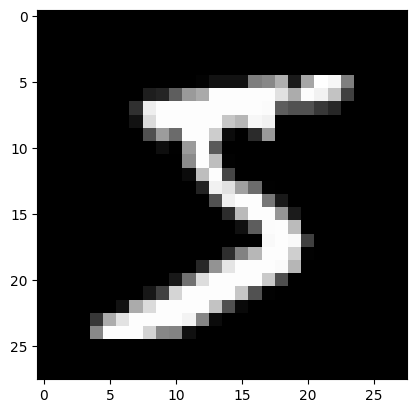

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

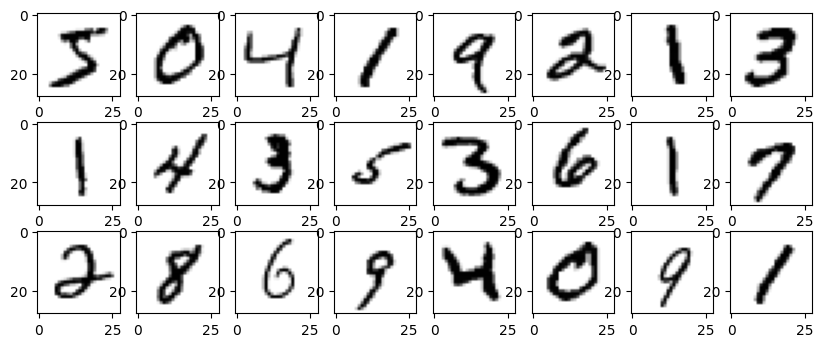

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
  ax.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

## Preprocessing

Noramalizing image pixels to range [0, 1]

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Reshaping to build a model

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Convert labels to one-hot encoder format

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Model Building

In [ ]:
IMG_SIZE = 28
BATCH_SIZE = 64
EPOCHS = 10

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [ ]:
model_checkpoint = ModelCheckpoint("digit_recognizer.keras", save_best_only=True)
early_stopping = EarlyStopping(patience=50)

In [ ]:
history = model.fit(
    train_images,
    train_labels,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
938/938 [==============================] - 56s 59ms/step - loss: 0.3558 - accuracy: 0.8874 - val_loss: 0.0966 - val_accuracy: 0.9708
Epoch 2/10
  3/938 [..............................] - ETA: 43s - loss: 0.1221 - accuracy: 0.9688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 64s 69ms/step - loss: 0.1292 - accuracy: 0.9614 - val_loss: 0.0677 - val_accuracy: 0.9781
Epoch 3/10
938/938 [==============================] - 61s 65ms/step - loss: 0.0972 - accuracy: 0.9718 - val_loss: 0.0509 - val_accuracy: 0.9851
Epoch 4/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0792 - accuracy: 0.9767 - val_loss: 0.0549 - val_accuracy: 0.9833
Epoch 5/10
938/938 [==============================] - 52s 55ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0433 - val_accuracy: 0.9869
Epoch 6/10
938/938 [==============================] - 53s 57ms/step - loss: 0.0606 - accuracy: 0.9823 - val_loss: 0.0492 - val_accuracy: 0.9864
Epoch 7/10
938/938 [==============================] - 54s 57ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 8/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0422 - val_accuracy: 0.9874
Epo

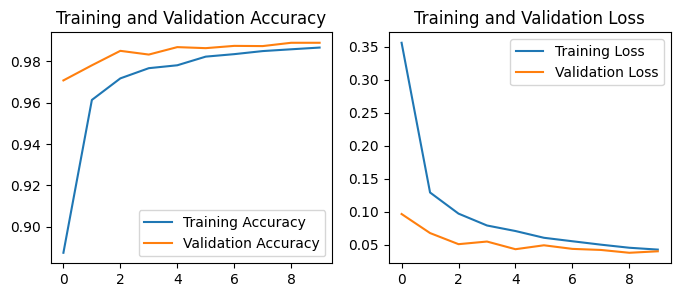

In [ ]:
def plot_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(8, 3))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

plot_loss(history)

Convert model to use in js

In [ ]:
!pip install tensorflowjs
!pip install jaxlib==0.4.21
!pip install jax==0.4.21

import tensorflowjs as tfjs

keras_model = tf.keras.models.load_model('/content/digit_recognizer.h5')
tfjs.converters.save_keras_model(keras_model, 'digits')

In [ ]:
!zip -r model.zip digits

from google.colab import files
files.download('model.zip')